In [2]:
#导入第三方包和数据，查看数据
import numpy as np
import pandas as pd
a =  pd.read_excel(r'xh.xlsx')
data = np.array(a)
x,y = data[:,:1050],data[:,1050]
print(x.shape,y.shape)

(530, 1050) (530,)


In [34]:
#切分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2 , random_state=0)

In [35]:
#导入PLSR包
from sklearn.cross_decomposition import PLSRegression

In [36]:
#进行PLSR分析预测
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train,Y_train)
k = pls2.coef_
C = pls2.score(X_test,Y_test)
print(C)

0.9293044144475843


In [37]:
#对测试集进行预测，验证预测效果
y_pred = pls2.predict(X_test)

In [38]:
import numpy as np
from sklearn.metrics import *

def evaluating(y_true, y_pre, samplesets="验证集"):
    """
    :param y_true: (n_samples, )
    :param y_pre: (n_samples, )
    :samplesets: string
    :return: None
    """
    evs_ = explained_variance_score(y_true, y_pre)
    mae_ = mean_absolute_error(y_true, y_pre)
    mse_ = mean_squared_error(y_true, y_pre)
    r2_ = r2_score(y_true, y_pre)
    rmse_ = np.sqrt(mse_)
    rpd_ = np.std(y_true)/rmse_

    print("*"*100)
    print(samplesets + ' 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差')
    print('结果     %6.4f       %6.4f    %6.4f   %6.4f   %6.4f        %6.4f' % (evs_, mae_, r2_, mse_, rmse_, rpd_))
    print("*"*100)
evaluating(y_pred,Y_test)

****************************************************************************************************
验证集 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差
结果     0.9309       0.0049    0.9308   0.0000   0.0064        3.8002
****************************************************************************************************


[0.95520274]
0.022549601247224882


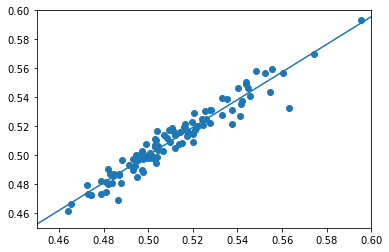

In [42]:
#PLSR的图
#将预测值和真实值做线性回归
import matplotlib.pyplot as plt
plt.scatter(y_pred,Y_test)
#model = LinearRegression()
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pre1 = y_pred.reshape(-1,1)
Y_A1 = Y_test.reshape(-1,1)
model.fit(y_pred,Y_test)
k = model.coef_
b = model.intercept_
print(k)
print(b)
x = np.linspace(-50,90,530)
y = 0.95520274*x+0.022549601247224882
plt.xlim(0.45,0.6)
plt.ylim(0.45,0.6)
plt.plot(x,y)
plt.show()

In [7]:
#一种均值化效果展示
np.abs(Y_test-y_pred).mean()  

0.027159045141353248

In [8]:
#将数据进行降维
pls2.transform(X_train,Y_train)

(array([[ 2.75841203e+01,  2.61434332e+01],
        [ 1.00238951e+01, -3.36255199e+00],
        [ 1.01040223e+01,  1.95059079e+01],
        [ 1.51594804e+01,  3.94478074e+01],
        [-1.43672671e+01,  7.05626677e+00],
        [-1.73216946e+01, -2.00563247e+01],
        [-1.10055125e+00, -4.49488252e+00],
        [ 9.64491700e+00,  4.43552397e+00],
        [-3.70596518e+01, -9.49493535e+00],
        [ 9.81244477e+00, -1.30367465e+01],
        [ 3.37292554e+01, -1.16654116e+01],
        [-8.19649120e+00,  7.45499845e+00],
        [-1.92546547e+01,  1.23980789e+01],
        [ 3.89434370e+00, -2.76269897e+00],
        [ 7.76557550e+00, -1.65179487e+01],
        [-3.40890523e+01,  2.15014665e+01],
        [ 8.65271846e+00,  9.90182494e+00],
        [-8.84248980e+00, -2.10689114e+01],
        [-1.85054590e+00,  3.07758674e+01],
        [-4.07368803e+00, -1.60139137e+01],
        [-1.41018536e+01, -2.08338456e+01],
        [-2.94287600e+01,  1.16533503e+01],
        [ 1.46662779e+01,  3.888

In [9]:
#将降维后的数据重新赋值给X,Y
X_train,Y_train = pls2.transform(X_train,Y_train)

In [10]:
#通过数据的维度展示新的数据
print(X_train.shape)

[[ 2.75841203e+01  2.61434332e+01]
 [ 1.00238951e+01 -3.36255199e+00]
 [ 1.01040223e+01  1.95059079e+01]
 [ 1.51594804e+01  3.94478074e+01]
 [-1.43672671e+01  7.05626677e+00]
 [-1.73216946e+01 -2.00563247e+01]
 [-1.10055125e+00 -4.49488252e+00]
 [ 9.64491700e+00  4.43552397e+00]
 [-3.70596518e+01 -9.49493535e+00]
 [ 9.81244477e+00 -1.30367465e+01]
 [ 3.37292554e+01 -1.16654116e+01]
 [-8.19649120e+00  7.45499845e+00]
 [-1.92546547e+01  1.23980789e+01]
 [ 3.89434370e+00 -2.76269897e+00]
 [ 7.76557550e+00 -1.65179487e+01]
 [-3.40890523e+01  2.15014665e+01]
 [ 8.65271846e+00  9.90182494e+00]
 [-8.84248980e+00 -2.10689114e+01]
 [-1.85054590e+00  3.07758674e+01]
 [-4.07368803e+00 -1.60139137e+01]
 [-1.41018536e+01 -2.08338456e+01]
 [-2.94287600e+01  1.16533503e+01]
 [ 1.46662779e+01  3.88857351e+00]
 [-8.57422983e+00  2.24166868e+01]
 [-2.89939058e+01  4.05898528e+00]
 [ 1.21918648e+01 -1.32380703e+01]
 [ 3.18261077e+00  9.19062505e+00]
 [-2.62691630e+01  1.74833595e+01]
 [-1.58323114e+01 -1

In [11]:
#展示为经过pls转化的数据维度
print(X_test.shape)

(106, 1050)
[[4.0900000e+02 7.3451100e-01 7.3703165e-01 ... 5.0950930e-01
  5.0984355e-01 5.0983985e-01]
 [4.3800000e+02 7.1832990e-01 7.2018180e-01 ... 5.3889380e-01
  5.3913845e-01 5.3900585e-01]
 [4.8600000e+02 7.9650860e-01 7.9853745e-01 ... 5.3931465e-01
  5.3966100e-01 5.3964805e-01]
 ...
 [1.0800000e+02 6.9361550e-01 6.9673450e-01 ... 4.6900585e-01
  4.6927680e-01 4.6927840e-01]
 [6.6000000e+01 7.7634180e-01 7.7956905e-01 ... 5.4661755e-01
  5.4688735e-01 5.4683120e-01]
 [3.8200000e+02 7.8851220e-01 7.9304610e-01 ... 5.0364160e-01
  5.0395160e-01 5.0392140e-01]]


In [12]:
X_test,Y_test = pls2.transform(X_test,Y_test)

In [13]:
#展示经过pls转化的数据维度，表示数据已经经过降维处理
print(X_test.shape)

(106, 2)
[[  9.11469092  -4.69178832]
 [ 18.99397587 -35.91236597]
 [ 27.00929544  20.63140748]
 [-29.44589721  -6.57946452]
 [ 25.22785034  61.06486647]
 [-29.04438415  53.55407339]
 [ 25.99963774  13.78033548]
 [ 28.66503998 -31.38665261]
 [ 36.00388905  23.73095861]
 [ 15.96669663 -12.26455631]
 [ 38.8091918   12.81388231]
 [ -2.03442095  -8.8073341 ]
 [ -3.46939079  -8.55167759]
 [ -9.44146296 -16.47447043]
 [ -1.21263923 -12.13877609]
 [-13.98830388  31.95032838]
 [  3.56983095 -24.10910579]
 [ 17.92654041   0.76854171]
 [  9.72105737 -11.80993416]
 [ 29.7907677  -16.64659362]
 [ 23.45602236 -23.80494466]
 [ -4.14193054  -0.14744291]
 [-23.39629533  -1.30576042]
 [ 62.82921353 -16.84388859]
 [  1.25328504 -26.65735496]
 [ 10.69986654   1.81778792]
 [ 11.74039179 -31.86034665]
 [-15.71556043  -0.21341074]
 [ -0.38258126  16.26603124]
 [-10.83580862  16.11037609]
 [-50.35540127 -12.35288132]
 [ 41.83150793 -25.92524497]
 [ -1.46357818 -15.69764284]
 [ -7.27106319   9.93504029]
 [ -7

In [14]:
from sklearn.neural_network import MLPRegressor
# BP神经网络回归模型
#设置隐藏节点为10
model = MLPRegressor(hidden_layer_sizes=(10,), random_state=1,learning_rate_init=0.1) 
# 训练模型
model.fit(X_train,Y_train)
# 模型预测
pre = model.predict(X_test)
# 模型得分
print(model.score(X_test,Y_test))

0.9154178587020251


In [15]:
y_pred = model.predict(X_test)
np.abs(Y_test-pre).mean()  

2.9927067028189382

In [16]:
y_pred.shape

(106, 2)

In [17]:
Y_test.shape

(106, 2)

[[0.9200956]] [-0.15179532]


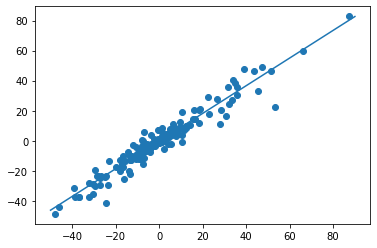

In [20]:
#将预测值和真实值做线性回归
import matplotlib.pyplot as plt
plt.scatter(y_pred,Y_test)
#model = LinearRegression()
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pre1 = y_pred.reshape(-1,1)
Y_A1 = Y_test.reshape(-1,1)
model.fit(pre1,Y_A1)
k = model.coef_
b = model.intercept_
print(k,b)
x = np.linspace(-50,90,530)
y = 0.9200956*x-0.15179532
plt.plot(x,y)
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import *

def evaluating(y_true, y_pre, samplesets="验证集"):
    """
    :param y_true: (n_samples, )
    :param y_pre: (n_samples, )
    :samplesets: string
    :return: None
    """
    evs_ = explained_variance_score(y_true, y_pre)
    mae_ = mean_absolute_error(y_true, y_pre)
    mse_ = mean_squared_error(y_true, y_pre)
    r2_ = r2_score(y_true, y_pre)
    rmse_ = np.sqrt(mse_)
    rpd_ = np.std(y_true)/rmse_

    print("*"*100)
    print(samplesets + ' 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差')
    print('结果     %6.4f       %6.4f    %6.4f   %6.4f   %6.4f        %6.4f' % (evs_, mae_, r2_, mse_, rmse_, rpd_))
    print("*"*100)
evaluating(pre1,Y_A1)

****************************************************************************************************
验证集 解释方差得分  平均绝对误差  决定系数  均方误差  均方根误差  相对分析误差
结果     0.9327       2.9927    0.9327   22.4535   4.7385        3.8534
****************************************************************************************************


[[ 1.8838319   4.80501099]
 [-0.34858529 -0.88912188]] [-0.34674823  0.06416248]


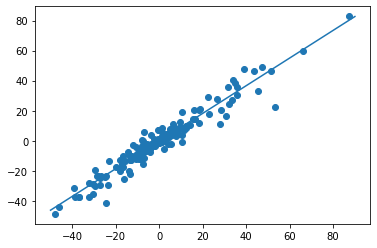

(212, 1)